In [76]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cmcrameri import cm
import pandas as pd

import os
from pathlib import Path
import shutil
import gzip
import re
import csv

import timeit


In [77]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve

In [78]:
single_binary = InitialBinaryTable.InitialBinaries(m1=85.543645, m2=84.99784, porb=446.795757, ecc=0.448872, tphysf=13700.0, kstar1=1, kstar2=1, metallicity=0.002)

print(single_binary)

   kstar_1  kstar_2     mass_1    mass_2        porb       ecc  metallicity  \
0      1.0      1.0  85.543645  84.99784  446.795757  0.448872        0.002   

    tphysf    mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  epoch_2  tms_1  \
0  13700.0  85.543645  84.99784  ...     0.0     0.0      0.0      0.0    0.0   

   tms_2  bhspin_1  bhspin_2  tphys  binfrac  
0    0.0       0.0       0.0    0.0      1.0  

[1 rows x 38 columns]


In [79]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

In [80]:
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)

In [81]:
print(bpp.columns)

Index(['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'porb', 'ecc',
       'RRLO_1', 'RRLO_2', 'evol_type', 'aj_1', 'aj_2', 'tms_1', 'tms_2',
       'massc_1', 'massc_2', 'rad_1', 'rad_2', 'mass0_1', 'mass0_2', 'lum_1',
       'lum_2', 'teff_1', 'teff_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2',
       'renv_1', 'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2',
       'bacc_1', 'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2',
       'bhspin_1', 'bhspin_2', 'bin_num'],
      dtype='object')


In [82]:
print(bcm.columns)

Index(['tphys', 'kstar_1', 'mass0_1', 'mass_1', 'lum_1', 'rad_1', 'teff_1',
       'massc_1', 'radc_1', 'menv_1', 'renv_1', 'epoch_1', 'omega_spin_1',
       'deltam_1', 'RRLO_1', 'kstar_2', 'mass0_2', 'mass_2', 'lum_2', 'rad_2',
       'teff_2', 'massc_2', 'radc_2', 'menv_2', 'renv_2', 'epoch_2',
       'omega_spin_2', 'deltam_2', 'RRLO_2', 'porb', 'sep', 'ecc', 'B_1',
       'B_2', 'SN_1', 'SN_2', 'bin_state', 'merger_type', 'bin_num'],
      dtype='object')


In [83]:
bpp = bpp[['mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'evol_type']]


In [84]:
from cosmic.plotting import evolve_and_plot

single_binary = InitialBinaryTable.InitialBinaries(m1=1.1, m2=0.001, porb=1000000, ecc=0.448872, tphysf=5669, kstar1=1, kstar2=1, metallicity=0.002)
bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)

BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}

#fig = evolve_and_plot(single_binary, t_min=None, t_max=None, BSEDict=BSEDict, sys_obs={})


In [85]:
bpp = bpp[['tphys', 'massc_1', 'rad_1', 'kstar_1', 'radc_1', 'evol_type']]
print(bpp)


          tphys    massc_1        rad_1  kstar_1    radc_1  evol_type
0      0.000000   0.000000    11.060285      1.0  0.000000        1.0
0      3.717075  31.385116    36.024109      2.0  1.880953        2.0
0      3.718373  31.662559   335.345512      2.0  1.890997        3.0
0      3.720012  32.012737  5626.023278      4.0  1.903624        2.0
0      3.740038  32.176152   172.422728      4.0  1.916349        4.0
0      3.741215   0.000000     1.916751      7.0  0.000000        2.0
0      4.071374   0.000000     1.658195      7.0  0.000000       15.0
0      4.071374  24.988585     0.000106     14.0  0.000106        2.0
0      4.894369  24.988590     0.000106     14.0  0.000106        2.0
0      4.895887  24.989628     0.000106     14.0  0.000106        3.0
0      4.896841  24.990676     0.000106     14.0  0.000106        2.0
0      4.896841  24.990676     0.000106     14.0  0.000106        7.0
0      4.896841  24.990676     0.000106     14.0  0.000106        8.0
0      4.896841  24.

/Users/wyang10/anaconda3/envs/cosmic/lib/python3.10/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


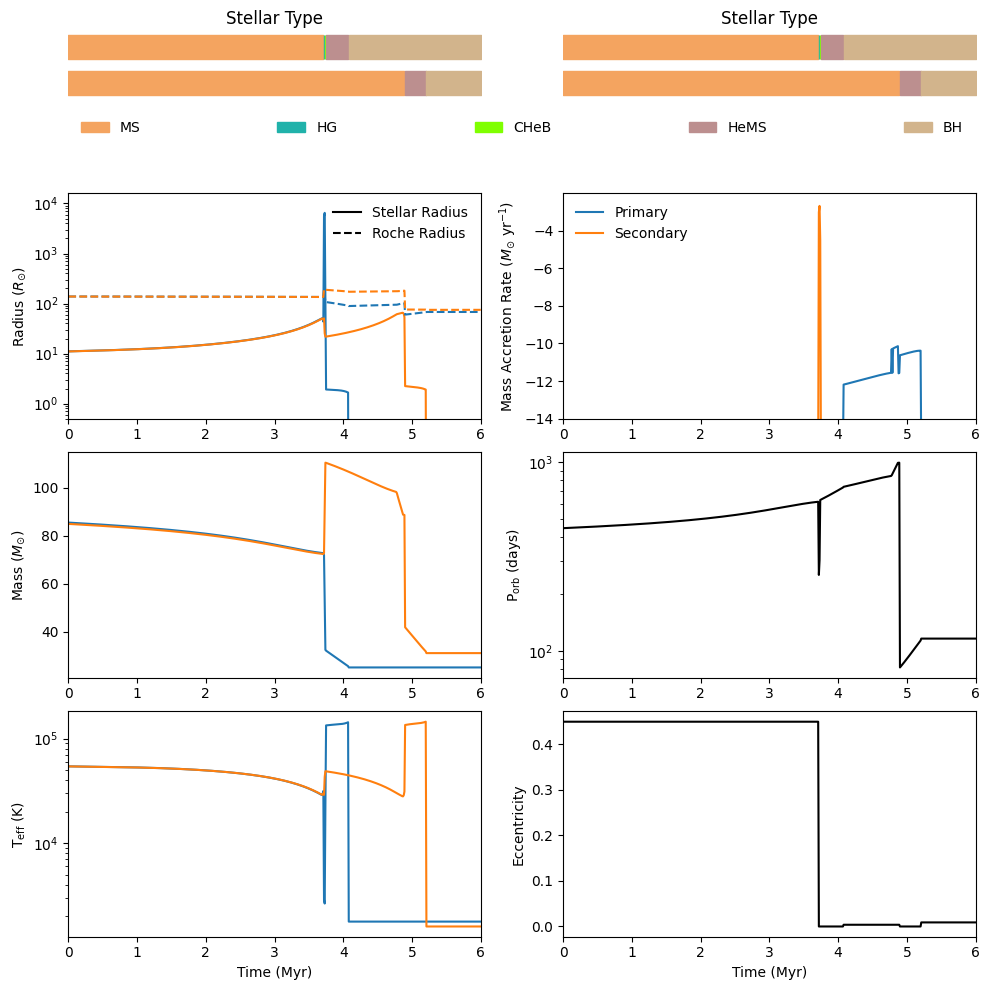

In [86]:
fig = evolve_and_plot(initC, t_min=None, t_max=6.0, BSEDict={}, sys_obs={})


In [87]:
data_path = 'data/updated_simulation_data'
output_file_all_all = 'processed_data/collisions_all_data.csv'
output_file_all = 'processed_data/allcollisions_GiantBH_data.csv'
output_file_nocollision = 'processed_data/nocollision_GiantBH_data.csv'
output_file_iscollision = 'processed_data/iscollision_GiantBH_data.csv'
#header = "#N,#rv,#rg,#z,#t_snapshot[myr],#M1[MSUN],#M2[MSUN],#k1,#k2,#id1,#id2,#sma[AU],#ecc,#bin_star_radius0[RSUN],#bin_star_radius1[RSUN],#snapshot, #roche_lobe1_calc[RSUN], #roche_lobe2_calc[RSUN],#radrol0,#radrol1"


5
0.851066
9.48531
15
0.847961
12.7907
0


/var/folders/3g/s_5y07nx3m9_wy_5wbtgxlt40000gr/T/ipykernel_41265/4032810639.py:79: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_handles.append(ax.scatter([], [], c=color, label=label))


IndexError: index 0 is out of bounds for axis 0 with size 0

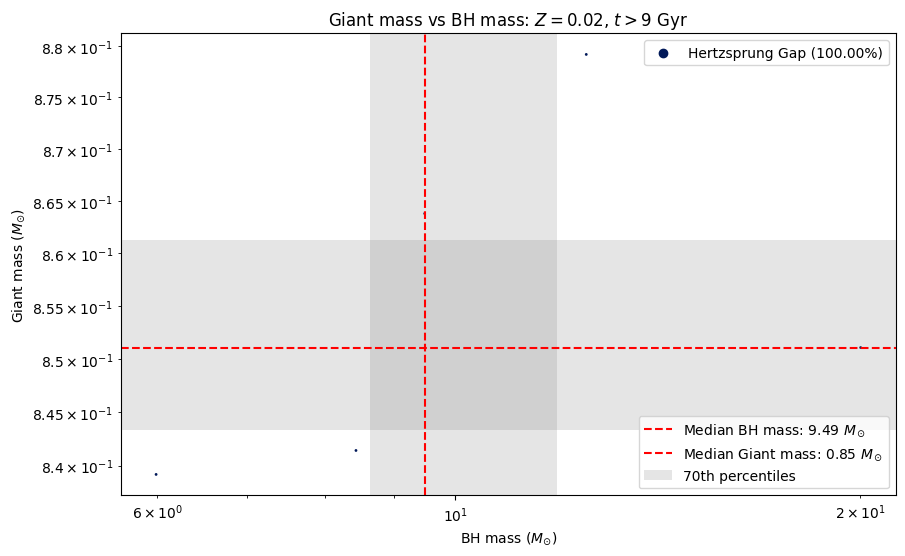

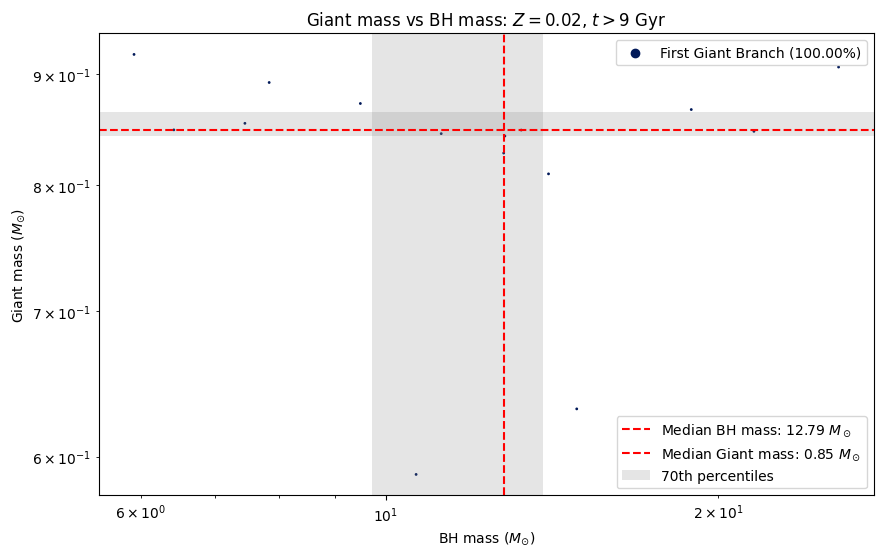

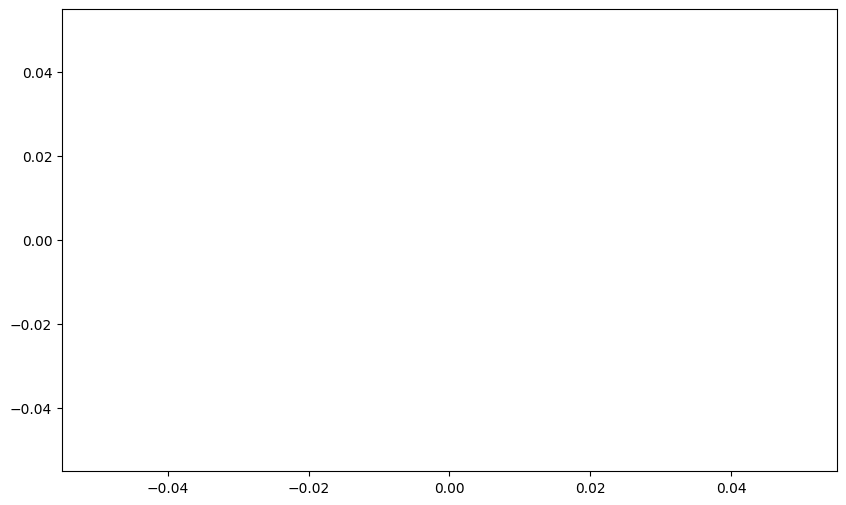

In [88]:
median_giant_ids = []
median_giant_tcolls = []
median_BH_masses = []
# Load the CSV file into a numpy array
data = np.loadtxt(output_file_nocollision, delimiter=',', dtype=str, skiprows=1)
for i in range(2,6):
    # Check k
    check_k = np.array(data[:, 19], dtype=float) == float(i)
    data_k = data[check_k]
    # Check z
    check_z = np.array(data_k[:, 3], dtype=float) == 0.002
    data_z = data_k[check_z]
    # Check age
    check_old = np.array(data_z[:, 4], dtype=float) > 9e3
    data_old = data_z[check_old]
    mass_BH = data_old[::, 9].astype(float)
    mass_Giant = data_old[::, 11].astype(float)
    type_Giant = data_old[::, 19].astype(float)
    times_GiantBH = data_old[::, 4].astype(float)
    id_Giant = data_old[::, 10].astype(float)
    print(len(mass_Giant))
    colors = cm.batlow(np.linspace(0, 1, len(set(type_Giant))))
    # Get unique numbers from the list
    unique_numbers = list(set(type_Giant))
    unique_numbers.sort()
    # Create a mapping of unique numbers to colors
    N_to_color = {num: colors[i % len(colors)] for i, num in enumerate(unique_numbers)}
    colors_N = [N_to_color[N] for N in type_Giant]
    # Get percentages for each type
    fractions = [100 * list(type_Giant).count(N) / len(type_Giant) for N in unique_numbers]
    fig, ax = plt.subplots(figsize=(10, 6))
    scatter = ax.scatter(mass_BH, mass_Giant, s=1, color=colors_N)
    median_Giant_index = np.argsort(mass_Giant)[len(mass_Giant)//2]
    median_BH_index = np.argsort(mass_BH)[len(mass_BH)//2]
    median_Giant_ids = id_Giant[median_Giant_index]
    median_BH = mass_BH[median_BH_index]
    median_Giant = mass_Giant[median_Giant_index]
    time_GiantBH_median = times_GiantBH[median_Giant_index]
    median_BH_line = ax.axvline(median_BH, color='red', linestyle='--', label=rf'Median BH mass: {median_BH:.2f} $M_\odot$')
    median_Giant_line = ax.axhline(median_Giant, color='red', linestyle='--', label=rf'Median Giant mass: {median_Giant:.2f} $M_\odot$')
    mass_Giant_30 = np.percentile(mass_Giant, 30)
    mass_Giant_70 = np.percentile(mass_Giant, 70)
    mass_BH_30 = np.percentile(mass_BH, 30)
    mass_BH_70 = np.percentile(mass_BH, 70)
    percentiles = ax.axhspan(mass_Giant_30, mass_Giant_70, color='gray', alpha=0.2, lw=0, label="70th percentiles")
    ax.axvspan(mass_BH_30, mass_BH_70, color='gray', alpha=0.2, lw=0)
    ax.set_xlabel(r'BH mass ($M_{\odot}$)')
    ax.set_ylabel(r'Giant mass ($M_{\odot}$)')
    ax.set_title('Giant mass vs BH mass: $Z=0.02$, $t>9$ Gyr')
    ax.set_xscale('log')
    ax.set_yscale('log')
    # Define the dictionary for the mapping
    stage_mapping = {
        0: "Main Sequence (MS), $< 0.7 M_\odot$",
        1: "MS, $> 0.7 M_\odot$",
        2: "Hertzsprung Gap",
        3: "First Giant Branch",
        4: "Core Helium Burning",
        5: "Early Asymptotic Giant Branch (AGB)",
        6: "Thermally Pulsing AGB",
        7: "Naked Helium Star MS",
        8: "Naked Helium Star Hertzsprung Gap",
        9: "Naked Helium Star Giant Branch",
        10: "Helium White Dwarf",
        11: "Carbon/Oxygen White Dwarf",
        12: "Oxygen/Neon White Dwarf",
        13: "Neutron Star",
        14: "Black Hole",
        15: "Massless Remnant"
    }
    # Replace integers with corresponding text
    giant_name_types = [stage_mapping[num] for num in unique_numbers]
    # Create a legend
    legend_labels = {stage_mapping[N]: f'{stage_mapping[N]} ({frac:.2f}%)' for N, frac in zip(unique_numbers, fractions)}
    legend_handles = []
    for N in unique_numbers:
        label = legend_labels[stage_mapping[N]]
        color = N_to_color[N]
        legend_handles.append(ax.scatter([], [], c=color, label=label))
    first_legend = ax.legend(handles=legend_handles, loc='best')
    ax.add_artist(first_legend)  # Add the first legend as an artist to the axes
    # Create the second legend for the median lines
    median_legend = ax.legend(handles=[median_BH_line, median_Giant_line, percentiles], loc='lower right')
    median_giant_tcolls.append(time_GiantBH_median)
    median_giant_ids.append(median_Giant_ids)
    median_BH_masses.append(median_BH)
    print(median_Giant)
    print(median_BH)

In [109]:
print(median_giant_masses)
print(median_giant_tcolls)
print(median_BH_masses)

[0.851066, 0.847961]
[12150.12679, 12494.68075]
[9.48531, 12.7907]


In [110]:
final_states = []

for mass, tcoll in zip(median_giant_masses, median_giant_tcolls):
    
    single_binary = InitialBinaryTable.InitialBinaries(m1=float(mass), m2=0.0001, porb=10000000, ecc=0, tphysf=float(tcoll), kstar1=1, kstar2=1, metallicity=0.002)

    BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.05, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.5, 'mxns': 2.5, 'beta': 0.125, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 3, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -1.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.02, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim' : 1}
    bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)

    #fig = evolve_and_plot(single_binary, t_min=None, t_max=None, BSEDict=BSEDict, sys_obs={})

    bpp = bpp[['tphys', 'mass_1', 'massc_1', 'rad_1', 'radc_1', 'kstar_1']]
    print(bpp)
    final_states.append(bpp.iloc[-1])

final_states_dict = [final_state.to_dict() for final_state in final_states]


for i, bh_mass in enumerate(median_BH_masses):
    final_states_dict[i]['bh_mass'] = bh_mass

print(final_states_dict)

          tphys    mass_1   massc_1     rad_1    radc_1  kstar_1
0      0.000000  0.851066  0.000000  0.791541  0.000000      1.0
0  11916.429032  0.851066  0.119138  1.879155  0.129558      2.0
0  12150.126790  0.850636  0.160644  2.507452  0.116193      2.0
          tphys    mass_1   massc_1     rad_1    radc_1  kstar_1
0      0.000000  0.847961  0.000000  0.788741  0.000000      1.0
0  12081.433035  0.847961  0.118849  1.869357  0.129671      2.0
0  12370.409977  0.847405  0.169532  2.661088  0.113885      3.0
0  12494.680750  0.846997  0.178953  3.216022  0.111594      3.0
[{'tphys': 12150.12679, 'mass_1': 0.8506357789653064, 'massc_1': 0.16064425882661842, 'rad_1': 2.5074524268240648, 'radc_1': 0.11619315027127824, 'kstar_1': 2.0, 'bh_mass': 9.48531}, {'tphys': 12494.68075, 'mass_1': 0.8469973702906087, 'massc_1': 0.17895266876847118, 'rad_1': 3.216022152722466, 'radc_1': 0.11159389197490653, 'kstar_1': 3.0, 'bh_mass': 12.7907}]


In [111]:
final_states = []

for mass, tcoll in zip(median_giant_masses, median_giant_tcolls):
    
    single_binary = InitialBinaryTable.InitialBinaries(m1=float(mass), m2=0.0001, porb=10000000, ecc=0, tphysf=float(tcoll), kstar1=1, kstar2=1, metallicity=0.002)

    BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.05, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.5, 'mxns': 2.5, 'beta': 0.125, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 3, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -1.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.02, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim' : 1}

    bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict, timestep_conditions =[['RRLO_1>=1', 'dtp=0.0'], ['RRLO_2>=1', 'dtp=0.0']])

    print(bcm[['tphys', 'kstar_1', 'kstar_2', 'mass_1', 'mass_2', 'RRLO_1', 'RRLO_2']])


    #fig = evolve_and_plot(single_binary, t_min=None, t_max=None, BSEDict=BSEDict, sys_obs={})

    #final_states.append(bpp.iloc[-1])

#final_states_dict = [final_state.to_dict() for final_state in final_states]


#for i, bh_mass in enumerate(median_BH_masses):
    #final_states_dict[i]['bh_mass'] = bh_mass

#print(final_states_dict)



         tphys  kstar_1  kstar_2    mass_1  mass_2    RRLO_1    RRLO_2
0      0.00000      1.0      0.0  0.851066  0.0001  0.000005  0.000036
0  12150.12679      2.0      0.0  0.850636  0.0001  0.000017  0.000036
         tphys  kstar_1  kstar_2    mass_1  mass_2    RRLO_1    RRLO_2
0      0.00000      1.0      0.0  0.847961  0.0001  0.000005  0.000036
0  12494.68075      3.0      0.0  0.846997  0.0001  0.000022  0.000036


In [91]:
data_path = 'data/updated_simulation_data'
output_file_all_all = 'processed_data/collisions_all_data.csv'
output_file_all = 'processed_data/allcollisions_GiantBH_data.csv'
output_file_nocollision = 'processed_data/nocollision_GiantBH_data.csv'
output_file_iscollision = 'processed_data/iscollision_GiantBH_data.csv'
#header = "#N,#rv,#rg,#z,#t_snapshot[myr],#M1[MSUN],#M2[MSUN],#k1,#k2,#id1,#id2,#sma[AU],#ecc,#bin_star_radius0[RSUN],#bin_star_radius1[RSUN],#snapshot, #roche_lobe1_calc[RSUN], #roche_lobe2_calc[RSUN],#radrol0,#radrol1"

output_file_initial = 'processed_data/initial_GiantBH_data.csv'
output_file_initial_all = 'processed_data/initial_all_GiantBH_data.csv'


In [92]:
def get_folder_names(directory):
    try:
        # List all entries in the specified directory
        entries = os.listdir(directory)
        
        # Filter out only the folders
        folders = [entry for entry in entries if os.path.isdir(os.path.join(directory, entry))]
        
        return folders
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Specify the directory
directory_path = r'data/updated_simulation_data'

# Get the list of folder names
str_numbers = get_folder_names(directory_path)

# Print the list of folder names
print("Folder names:", str_numbers)
print("Number of folders:", len(str_numbers))

Folder names: ['N4.0_rv1.0_rg8.0_z0.0002', 'N8.0_rv0.5_rg20.0_z0.02', 'N8.0_rv1.0_rg20.0_z0.002', 'N2.0_rv1.0_rg2.0_z0.0002', 'N16_rv2.0_rg8.0_z0.002', 'N16_rv1.0_rg20.0_z0.02', 'N4.0_rv4.0_rg2.0_z0.002', 'N16_rv2.0_rg2.0_z0.002', 'N8.0_rv2.0_rg20.0_z0.0002', 'N2.0_rv0.5_rg20.0_z0.02', 'N2.0_rv2.0_rg20.0_z0.0002', 'N2.0_rv1.0_rg8.0_z0.02', 'N8.0_rv1.0_rg2.0_z0.02', 'N4.0_rv4.0_rg8.0_z0.002', 'N16_rv1.0_rg20.0_z0.0002', 'N4.0_rv2.0_rg8.0_z0.02', 'N16_rv4.0_rg2.0_z0.02', 'N16_rv0.5_rg2.0_z0.02', 'N2.0_rv2.0_rg8.0_z0.02', 'N4.0_rv2.0_rg2.0_z0.002', 'N8.0_rv2.0_rg2.0_z0.02', 'N4.0_rv1.0_rg8.0_z0.02', 'N16_rv4.0_rg8.0_z0.002', 'N16_rv1.0_rg8.0_z0.0002', 'N4.0_rv2.0_rg8.0_z0.002', 'N4.0_rv1.0_rg20.0_z0.02', 'N16_rv4.0_rg2.0_z0.002', 'N2.0_rv1.0_rg20.0_z0.002', 'N8.0_rv1.0_rg2.0_z0.0002', 'N4.0_rv1.0_rg20.0_z0.002', 'N16_rv2.0_rg20.0_z0.02', 'N8.0_rv1.0_rg8.0_z0.0002', 'N2.0_rv0.5_rg2.0_z0.002', 'N8.0_rv0.5_rg8.0_z0.002', 'N16_rv1.0_rg8.0_z0.002', 'N16_rv1.0_rg2.0_z0.0002', 'N2.0_rv0.5_rg8.0_

In [116]:
all_data = []
cumidlen = 0

for str_number in str_numbers:
    final_states_list = []

    all_bpps = []
    # Go through each model individually
    initial_path = f'data/updated_simulation_data/{str_number}/info/initial.snap0000.dat'

    # Grab the values of the parameters from the file path
    pattern = r"N(?P<N>[\d.]+)_rv(?P<rv>[\d.]+)_rg(?P<rg>[\d.]+)_z(?P<z>[\d.]+)"
    match = re.search(pattern, str_number)
    if match:
        mod_params = [float(match.group('N')), float(match.group('rv')), float(match.group('rg')), float(match.group('z'))]
        mod_params_dict = {'N':float(match.group('N')), 'rv':float(match.group('rv')), 'rg':float(match.group('rg')), 'z':float(match.group('z'))}
    else:
        print(f"Pattern {str_number} not found in the file path.")
        continue
    
    
    with open(output_file_nocollision, mode='r') as file:
        reader = csv.reader(file)
        header = next(reader)
        coll_BH_masses = []
        ids = []
        for row in reader:
            if (float(row[0]) == float(mod_params[0]) and float(row[1]) == float(mod_params[1]) and 
                float(row[2]) == float(mod_params[2]) and float(row[3]) == float(mod_params[3])):
                coll_BH_masses.append(float(row[9]))
                ids.append(float(row[10]))
        idlen = len(ids)
        cumidlen += idlen

        #print(coll_BH_masses, mod_params)

    # Open the CSV file and read its contents
    with open(output_file_initial, mode='r') as file:
        reader = csv.reader(file)
        
        # Skip the header row
        header = next(reader)
        
        #initial_giant_Z = []
        #initial_giant_masses = []
        #initial_giant_tcolls = []

        final_bpp_rows = []
        for idno, BHmass in zip(ids,coll_BH_masses):

            flag = False
            # Iterate through each row in the CSV file
            for row in reader:
                # Check if the first four columns match the model parameters
                if (float(row[0]) == float(mod_params[0]) and float(row[1]) == float(mod_params[1]) and 
                    float(row[2]) == float(mod_params[2]) and float(row[3]) == float(mod_params[3]) and
                    float(row[5]) == float(idno)):

                    # RUN CODE HERE
                    #initial_giant_Z.append(float(row[3]))
                    #initial_giant_masses.append(float(row[6]))
                    #initial_giant_tcolls.append(float(row[67]))

                    #or even just straightup

                    single_binary = InitialBinaryTable.InitialBinaries(m1=float(row[6]), m2=0.00001, porb=10000000, ecc=0, tphysf=float(row[67]), kstar1=1, kstar2=1, metallicity=float(row[3]))
                    BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'rtmsflag' : 0, 'wd_mass_lim': 1}
                    bpp, bcm, initC, kick_info = Evolve.evolve(initialbinarytable=single_binary, BSEDict=BSEDict)
                    bpp = bpp[['tphys', 'mass_1', 'massc_1', 'rad_1', 'radc_1', 'kstar_1']]
                    
                    #GRAB THE CORE MASS FROM BPP WHEN IT BECOMES A GIANT
                    final_bpp = bpp.iloc[-1].to_dict()
                    final_bpp['bh_mass'] = BHmass
                    final_states_list.append(final_bpp)

                    flag = True
            if flag == False:
                print(f"ID {idno} not found in initial data")

                
        #print(final_states_list)
        #print(coll_BH_masses)
    
    #final_bpp_all = pd.DataFrame(final_bpp_rows)
    #sim_results = final_bpp_all.values.tolist()

    # Append the model parameters to the start of each sublist
    for data in final_states_list:
        data.update(mod_params_dict)
    
    #print(final_states_list)
    # Append the data to the list of all data
    if len(final_states_list) > 0:
        all_data += final_states_list
    
    print(f"Finished {str_number}. All data: {len(all_data)}. Data list: {len(final_states_list)}")
    
    #print(cumidlen)
    

Finished N4.0_rv1.0_rg8.0_z0.0002. All data: 1. Data list: 1
ID 747271.0 not found in initial data
ID 59383.0 not found in initial data
ID 417262.0 not found in initial data
ID 5571.0 not found in initial data
ID 152672.0 not found in initial data
ID 806878.0 not found in initial data
ID 523434.0 not found in initial data
ID 576702.0 not found in initial data
ID 316287.0 not found in initial data
ID 174675.0 not found in initial data
ID 210323.0 not found in initial data
ID 495961.0 not found in initial data
ID 412235.0 not found in initial data
ID 519760.0 not found in initial data
ID 601980.0 not found in initial data
ID 724076.0 not found in initial data
ID 340183.0 not found in initial data
ID 502522.0 not found in initial data
ID 325770.0 not found in initial data
ID 209416.0 not found in initial data
ID 67275.0 not found in initial data
ID 246968.0 not found in initial data
ID 22867.0 not found in initial data
ID 215854.0 not found in initial data
ID 635814.0 not found in initial

In [112]:
print(len(all_data))

122


In [117]:
print(all_data)

[{'tphys': 76.37189942, 'mass_1': 5.615786657352168, 'massc_1': 1.7940641685234155, 'rad_1': 53.627891617386354, 'radc_1': 0.34385846292135663, 'kstar_1': 4.0, 'bh_mass': 29.0828, 'N': 4.0, 'rv': 1.0, 'rg': 8.0, 'z': 0.0002}, {'tphys': 6.644045866, 'mass_1': 7.359390717168753, 'massc_1': 5.083601653591658, 'rad_1': 0.8431523539226458, 'radc_1': 6.999996249998995e-05, 'kstar_1': 8.0, 'bh_mass': 5.91116, 'N': 8.0, 'rv': 0.5, 'rg': 20.0, 'z': 0.02}, {'tphys': 17.72971267, 'mass_1': 13.0844956566756, 'massc_1': 4.713040462422017, 'rad_1': 930.1251338062399, 'radc_1': 0.6149003363148966, 'kstar_1': 4.0, 'bh_mass': 40.4707, 'N': 8.0, 'rv': 1.0, 'rg': 20.0, 'z': 0.002}, {'tphys': 15.75895637, 'mass_1': 13.829506986362222, 'massc_1': 3.5263026514108433, 'rad_1': 23.716931329347734, 'radc_1': 0.49707125935968255, 'kstar_1': 4.0, 'bh_mass': 28.3983, 'N': 2.0, 'rv': 1.0, 'rg': 2.0, 'z': 0.0002}, {'tphys': 107.8249811, 'mass_1': 4.779968053415765, 'massc_1': 0.9567597472560269, 'rad_1': 95.4106061

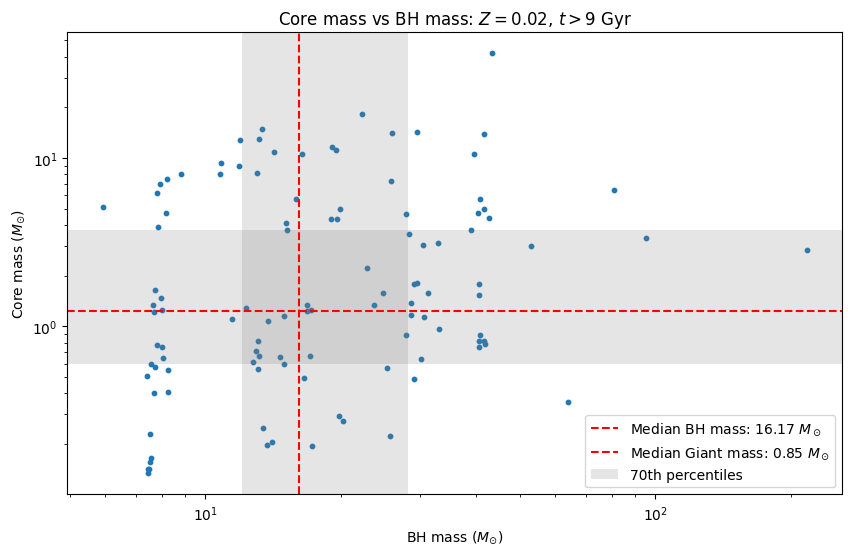

In [122]:
mass_BH = []
mass_core = []

for star in all_data:
    mass_BH.append(star['bh_mass'])
    mass_core.append(star['massc_1'])


fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(mass_BH, mass_core, s=10)

median_BH = np.median(mass_BH)
median_core = np.median(mass_core)
median_BH_line = ax.axvline(median_BH, color='red', linestyle='--', label=rf'Median BH mass: {median_BH:.2f} $M_\odot$')
median_core_line = ax.axhline(median_core, color='red', linestyle='--', label=rf'Median core mass: {median_core:.2f} $M_\odot$')

mass_core_30 = np.percentile(mass_core, 30)
mass_core_70 = np.percentile(mass_core, 70)
mass_BH_30 = np.percentile(mass_BH, 30)
mass_BH_70 = np.percentile(mass_BH, 70)

percentiles = ax.axhspan(mass_core_30, mass_core_70, color='gray', alpha=0.2, lw=0, label="70th percentiles")
ax.axvspan(mass_BH_30, mass_BH_70, color='gray', alpha=0.2, lw=0)

ax.set_xlabel(r'BH mass ($M_{\odot}$)')
ax.set_ylabel(r'Core mass ($M_{\odot}$)')
ax.set_title('Core mass vs BH mass: $Z=0.02$, $t>9$ Gyr')
ax.set_xscale('log')
ax.set_yscale('log')

# Create the second legend for the median lines
median_legend = ax.legend(handles=[median_BH_line, median_Giant_line, percentiles], loc='lower right')
